In [1]:
#Importing all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("Pokemon.csv")
#One Hot Encode
#One Hot Encode converts categorical columns in a dataframe to a numerical format( 0's and 1's) so
#that ML models can process them.
#It creates a new column for each category in a categorical column. Each row gets 0 or 1 based on
#the category of the categorical column.
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
encoder=OneHotEncoder(sparse_output=False)
categorical_columns=df.select_dtypes(include=["object"]).columns.tolist()
categorical_columns=["Type 1","Type 2"]
# creating the encoded array
encoded_array=encoder.fit_transform(df[categorical_columns])
#converting the array to a dataframe, so that we can add it to the original dataframe
encoded_df=pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(categorical_columns))
# joining it to the original dataframe
df_encoded=df.drop(columns=categorical_columns).join(encoded_df)

In [4]:
#Defining the features
X=df[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']] 
#Defining the Targer
y=df[['Type 1']]
#Splitting the dataset into train and test datasets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
#Scaling the features, so as to improve the accuracy of the ML models
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Before training the LogisticRegression Model, lets us gain some insights on how it predicts.
Unlike LinearRegression, logistic regression predicts True or False! i.e 0 or 1. 
Thus in order to make classifications, the y-axis is converted to log of odds
by the function log(p / 1-p). This generates a straight line, which can then be fit to the data using different methods. 
Line of best fit can be found out by calculating the log likelihood of the data.
Then we can make the predictions.


Accuracy: 18.75%


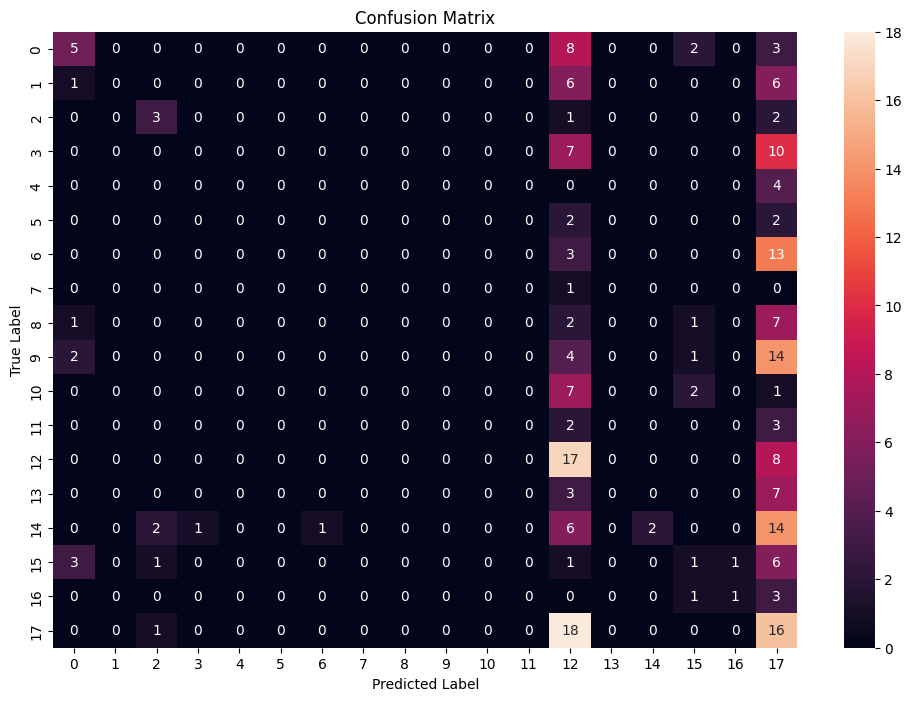

In [6]:
#Training a Logistic Regression Model and evaluating its performance
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
#Creating a confusion matrix with the help of the heatmap function of seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Now we will train KNN Classifier
Suppose we had some data that could be plotted on a line, and I need to identify them into n numbers of clusters in order to make predictions.
So all the points are plotted on the line. 
Assume we want to identify 4 clusters(4 Categories)
Now, we randomly select 4 points on the line, measure the distance of the 1st point and the 4 initial clusters and assign the 1st point to the nearest cluster.
We keep doing this until they are classified into the clusters
Then we try different values for K, repeat the same thing, and see the variation 
as and as we increase the value of k, the reduction in variation decreases.
Thus we choose the optimum value of K from error rate vs K graph or reduction in variation vs K graph.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
    

In [8]:
df=pd.read_csv('Pokemon.csv')
encoder=OneHotEncoder(sparse_output=False)
categorical_columns=["Type 1","Type 2"]
encoded_array=encoder.fit_transform(df[categorical_columns])
encoded_df=pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(categorical_columns))
df_encoded=df.drop(columns=categorical_columns).join(encoded_df)
X=df[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y=df['Type 1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [9]:
#Training a KNN Classifier and evaluating its performance
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.24375


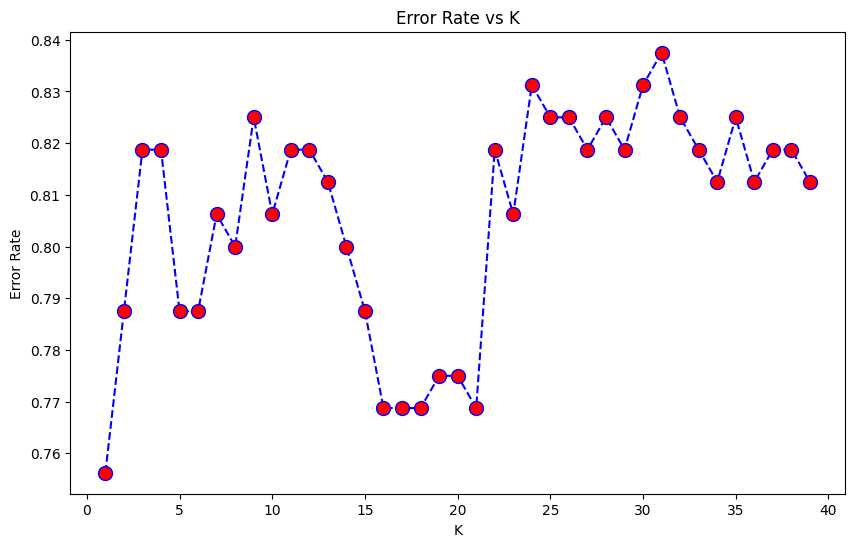

In [10]:
#Plotting error rate vs K graph to choose the optimal K value
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [11]:
model=KNeighborsClassifier(n_neighbors=16)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.23125


In [12]:
model=KNeighborsClassifier(n_neighbors=17)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.23125


In [13]:
model=KNeighborsClassifier(n_neighbors=19)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.225


Now we will train a Decision Tree Classifier
A decision ree is made by quantifying the impurity of leaves.One of the way to do so is using Gini Impurity.
It is defined as 1- (Probability of Yes)^2 - (Probabilitly of No)^2
In order to decide the top node(Root Node)
We calculate the gini impurity of each feature column. 
The one with the lowest gini impurity is chosen as the top node.
Then we simplify the impure nodes further by repeating the above process again and again.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df=pd.read_csv("Pokemon.csv")
X=df[["Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]]
y=df["Type 1"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
classifier=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=3,min_samples_leaf=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.2


Now we will train a RandomForest CLassifier
Random Forests combine the simplicity of decison trees with flexibility resulting in a vast improvement in accuracy.
Steps to create a RandomForest Classifier:
Step 1: Creating a bootstrapped dataset.
We create a bootstrapped dataset that is the same size as the original data.
We randomly select samples from the original dataset to do this, and we are allowed to pick the same sample more than once

Step 2: Create a decision tree using the bootstrapped dataset, but only using a random subset of columns(i.e features)
For example: 
Randomly select 2 columns for the root node. 
Continue to do this by selecting 2 random columns.
Repeat the same process for hundres of time and our Random FOrest has been made.

Step 3: Predicting 
To predict, we take the features from the test dataset and let it run through all the decsion trees. 
Then we calculate the votes, whichever is more wins.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
df=pd.read_csv("Pokemon.csv")
X=df[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y=df['Type 1']
X.fillna(X.mean(), inplace=True)
y.dropna(inplace=True)
encoder=LabelEncoder()
y_encoded=encoder.fit_transform(y)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
model = RandomForestClassifier(n_estimators=135, random_state=50)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))


0.28125


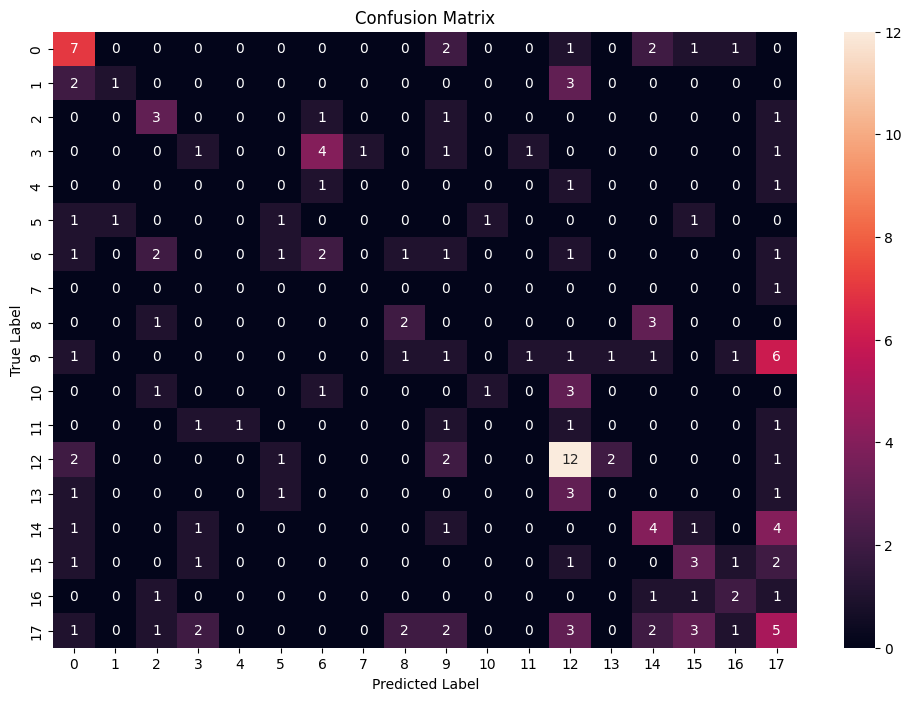

In [16]:
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
